# **1. Load packages and data**


In [319]:
from google.colab import files
upload = files.upload()

Saving Quant Exercise.csv to Quant Exercise (3).csv


In [320]:
import pandas as pd
import numpy as np
import pkg_resources

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [321]:
df = pd.read_csv('Quant Exercise.csv')

In [322]:
df.head()

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,...,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM,GEO_ID,county,fips
0,84387,137,84387.000,NaN,53245.000,910,63.100,1.100,53200,911,...,NaN,6.200,0.800,NaN,NaN,17.400,1.800,0500000US42001,Adams,42001.000
1,1015608,631,1015608.000,NaN,660484.000,3044,65.000,0.300,659555,3038,...,NaN,7.700,0.400,NaN,NaN,21.300,0.700,0500000US42003,Allegheny,42003.000
2,54444,101,54444.000,NaN,31615.000,519,58.100,1.000,31593,518,...,NaN,8.400,1.100,NaN,NaN,23.800,2.200,0500000US42005,Armstrong,42005.000
3,136682,202,136682.000,NaN,84153.000,1035,61.600,0.700,84051,1040,...,NaN,6.800,0.700,NaN,NaN,20.800,1.300,0500000US42007,Beaver,42007.000
4,40064,86,40064.000,NaN,23144.000,447,57.800,1.100,23140,447,...,NaN,8.000,1.200,NaN,NaN,25.000,3.200,0500000US42009,Bedford,42009.000


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 551 entries, DP03_0001E to fips
dtypes: float64(300), int64(249), object(2)
memory usage: 292.8+ KB


In [324]:
# Create a dictionary to store the information
variables_info = {
    'Variable': df.columns,
    'Non-Missing Count': df.count(),
    'Variable Type': df.dtypes
}

variables_df = pd.DataFrame(variables_info)
variables_df.to_excel('features.xlsx', index=False)

# **2. Clean and standardize data**


In [279]:
# Calculate the missing rate for each variable
missing_rate = df.isnull().mean()
missing_variables = missing_rate[missing_rate > 0]
print(missing_variables)

DP03_0001PM   1.000
DP03_0002E    0.015
DP03_0008PM   1.000
DP03_0009E    1.000
DP03_0009M    1.000
               ... 
DP03_0136E    1.000
DP03_0136M    1.000
DP03_0137E    1.000
DP03_0137M    1.000
fips          0.015
Length: 93, dtype: float64


In [280]:
# Drop variables with missing rate = 1
missing_rate = df.isnull().mean()
variables_to_drop = missing_rate[missing_rate == 1].index
df.drop(variables_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 460 entries, DP03_0001E to fips
dtypes: float64(209), int64(249), object(2)
memory usage: 244.5+ KB


In [281]:
# Standardize all continous variables
continuous_vars = df.select_dtypes(include='number').columns
index = np.where(continuous_vars == 'fips')
continuous_vars = np.delete(continuous_vars, index)

# Standardize continuous variables
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])
pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,DP03_0003PE,...,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,fips
count,68.000,68.000,68.000,67.000,68.000,68.000,68.000,68.000,68.000,68.000,...,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,67.000
mean,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,...,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,42067.000
std,1.007,1.007,1.007,1.008,1.007,1.007,1.007,1.007,1.007,1.007,...,1.007,1.007,1.007,1.007,1.007,1.007,1.007,1.007,1.007,38.970
min,-0.241,-0.700,-0.241,-0.240,-0.677,-5.897,-1.540,-0.242,-0.681,-5.905,...,-1.622,-1.800,-1.444,-1.810,-1.677,-1.828,-1.535,-1.738,-1.650,42001.000
25%,-0.216,-0.503,-0.216,-0.217,-0.467,-0.447,-0.597,-0.219,-0.470,-0.437,...,-0.709,-0.672,-0.573,-0.534,-0.870,-0.725,-0.652,-0.628,-0.733,42034.000
50%,-0.188,-0.318,-0.188,-0.192,-0.236,0.069,-0.125,-0.192,-0.237,0.065,...,-0.161,-0.107,-0.154,-0.026,-0.063,-0.120,-0.063,-0.101,-0.166,42067.000
75%,-0.101,0.183,-0.101,-0.110,0.169,0.612,0.347,-0.102,0.172,0.614,...,0.387,0.386,0.362,0.433,0.340,0.423,0.379,0.395,0.380,42100.000
max,8.059,6.587,8.059,7.993,6.826,1.469,5.221,8.052,6.811,1.470,...,3.674,3.164,4.104,5.031,3.165,4.114,4.353,4.194,3.581,42133.000


In [282]:
# Calculate the missing rate for each variable
df_clean = df.copy()
missing_rate = df_clean.isnull().mean()
missing_variables = missing_rate[missing_rate > 0]
print(missing_variables)

DP03_0002E   0.015
fips         0.015
dtype: float64


In [283]:
# Fill missing values with mean and create missing indicator
missing_variables = df_clean.columns[df_clean.isnull().any()]

for variable in missing_variables:
    mean_value = df_clean[variable].mean()
    df_clean[variable + '_missing'] = df_clean[variable].isnull().astype(int)
    df_clean[variable].fillna(mean_value, inplace = True)
df_clean.head()    

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,DP03_0003PE,...,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,GEO_ID,county,fips,DP03_0002E_missing,fips_missing
0,-0.177,-0.379,-0.177,-0.175,-0.165,0.651,0.032,-0.177,-0.165,0.649,...,-0.736,-0.938,-0.652,-1.308,-0.479,0500000US42001,Adams,42001.000,0,0
1,0.562,1.101,0.562,0.587,1.215,0.950,-1.225,0.590,1.218,0.949,...,-1.139,-0.404,-1.240,-0.510,-1.338,0500000US42003,Allegheny,42003.000,0,0
2,-0.201,-0.487,-0.201,-0.202,-0.418,-0.136,-0.125,-0.204,-0.421,-0.141,...,0.206,-0.155,-0.210,0.001,-0.166,0500000US42005,Armstrong,42005.000,0,0
3,-0.136,-0.184,-0.136,-0.136,-0.084,0.415,-0.597,-0.138,-0.082,0.412,...,-0.736,-0.725,-0.799,-0.613,-0.869,0500000US42007,Beaver,42007.000,0,0
4,-0.212,-0.532,-0.212,-0.213,-0.465,-0.183,0.032,-0.215,-0.467,-0.172,...,0.206,-0.298,-0.063,0.246,0.614,0500000US42009,Bedford,42009.000,0,0


In [284]:
# output cleaned dataset
file_path = 'df_clean.csv'
df_clean.to_csv(file_path, index=False)

# **3. Visualize data**

Data assumptions:

1. Independence assumption: Assume that the observations or measurements for each county are independent of each other. 

2. Outlier detection assumption: Assume that the majority of the data points are "normal" or non-anomalous, and that outliers are relatively rare occurrences.

3. Feature scaling assumption: The numerical variables are scaled or standardized.


<ipython-input-285-e7946e20e1e9>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


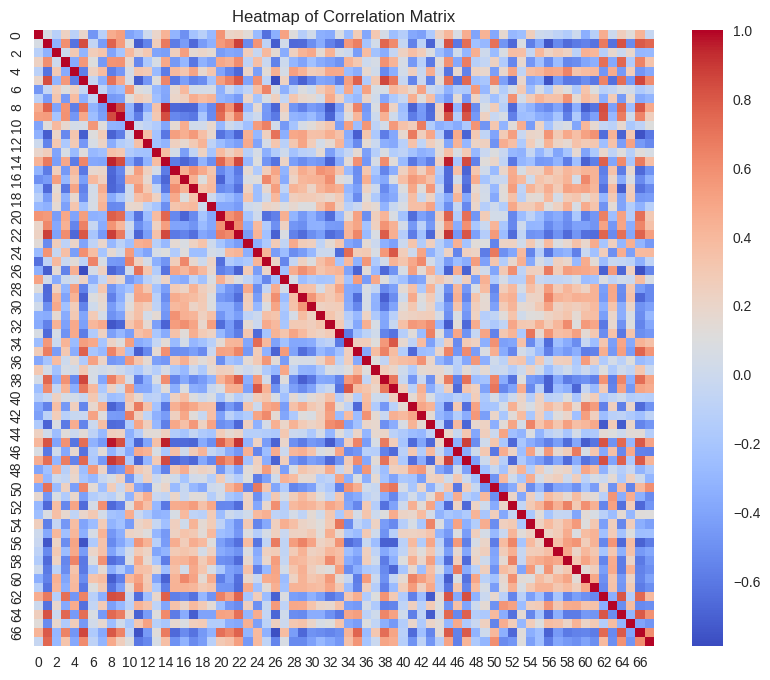

In [285]:
# Create a random correlation matrix of 455 variables
drop_vars = ['GEO_ID', 'county', 'fips', 'DP03_0002E_missing', 'fips_missing']
df1 = df_clean.drop(drop_vars, axis = 1)
df_trans = df1.transpose()

correlation_matrix = df_trans.corr()
# Generate the heatmap
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Heatmap of Correlation Matrix')
plt.show()

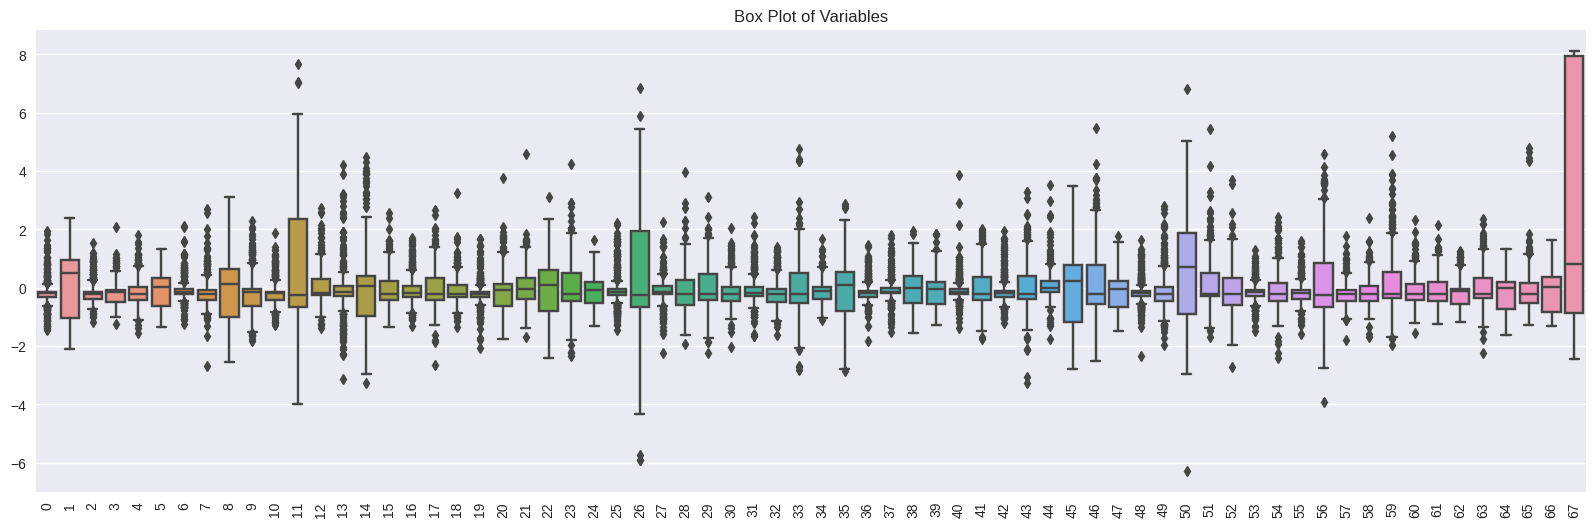

In [286]:
# Plot the box plot
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_trans)
plt.title('Box Plot of Variables')
plt.xticks(rotation=90)
plt.show()

# **4. Anomaly detection**


In [287]:
# Perform PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df1)

# Create a dataframe from the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Print the variance of each component
variance = pca.explained_variance_
total_variance = sum(variance)
for i, var in enumerate(variance):
    var_pct = var/total_variance
    print(f"Variance of PC{i+1}: {var_pct:.2f}")

Variance of PC1: 0.64
Variance of PC2: 0.23
Variance of PC3: 0.08
Variance of PC4: 0.04


In [288]:
df2 = pd.concat([df_clean[drop_vars], df_pca], axis=1)
df2.head()

,GEO_ID,county,fips,DP03_0002E_missing,fips_missing,PC1,PC2,PC3,PC4
0,0500000US42001,Adams,42001.000,0,0,-1.058,-6.212,-4.546,-2.414
1,0500000US42003,Allegheny,42003.000,0,0,19.722,-8.556,2.561,5.409
2,0500000US42005,Armstrong,42005.000,0,0,-3.931,-1.397,3.065,-2.523
3,0500000US42007,Beaver,42007.000,0,0,1.737,-6.903,1.298,0.268
4,0500000US42009,Bedford,42009.000,0,0,-6.020,1.194,0.991,-5.071


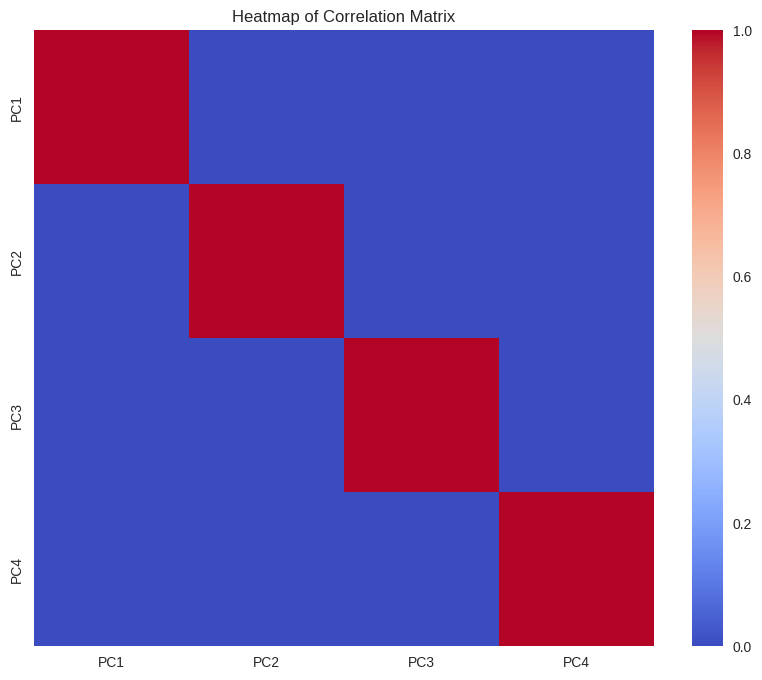

In [289]:
# Visualize principle components
correlation_matrix = df_pca.corr()
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [290]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GEO_ID              68 non-null     object 
 1   county              68 non-null     object 
 2   fips                68 non-null     float64
 3   DP03_0002E_missing  68 non-null     int64  
 4   fips_missing        68 non-null     int64  
 5   PC1                 68 non-null     float64
 6   PC2                 68 non-null     float64
 7   PC3                 68 non-null     float64
 8   PC4                 68 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 4.9+ KB


In [307]:
# Detect anomalies using Isolation Forest

# Instantiate and fit the Isolation Forest model
model1 = IsolationForest(contamination=0.1)
model1.fit(df_pca.values)

# Predict outliers
df2['outliers_IF'] = model1.predict(df_pca.values)

# Create a mask for outliers
df2['outliers_mask_IF'] = df2['outliers_IF'] == -1

# Filter the dataframe to show only the outliers
df_outliers_IF = df2[df2['outliers_mask_IF'] == True]

df_outliers_IF.head(20)

,GEO_ID,county,fips,DP03_0002E_missing,fips_missing,PC1,PC2,PC3,PC4,outliers,outliers_mask,outliers_IF,outliers_mask_IF,outliers_SVM,outliers__mask_SVM
11,0500000US42023,Cameron,42023.000,0,0,-22.956,33.293,0.375,15.606,-1,True,-1,True,1,False
14,0500000US42029,Chester,42029.000,0,0,12.241,-16.462,-10.990,7.499,-1,True,-1,True,-1,True
26,0500000US42053,Forest,42053.000,0,0,-22.790,32.841,-3.587,8.641,-1,True,-1,True,1,False
46,0500000US42093,Montour,42093.000,0,0,-11.662,7.764,-12.732,2.539,1,False,-1,True,-1,True
50,0500000US42101,Philadelphia,42101.000,0,0,26.964,4.095,16.809,11.469,-1,True,-1,True,-1,True
56,0500000US42113,Sullivan,42113.000,0,0,-14.872,13.563,-9.110,-1.037,1,False,-1,True,1,False
67,0400000US42,Pennsylvania,42067.000,0,1,106.297,35.881,-5.171,-6.694,-1,True,-1,True,-1,True


In [299]:
fips_missing = df2[df2['fips_missing'] == 1]

In [308]:
# Scatter plot of the data points
def scatters(var1, var2):
  plt.scatter(df2[var1], df2[var2], color='blue', label='Normal')
  plt.scatter(df_outliers_IF[var1], df_outliers_IF[var2], color='red', 
              label='Outliers')
  plt.scatter(fips_missing[var1], fips_missing[var2], color='green', 
              label='fips issing')

  # Add labels for the 'county' variable next to the red dots
  for i, county in enumerate(df_outliers_IF['county']):
      plt.text(df_outliers_IF[var1].iloc[i], df_outliers_IF[var2].iloc[i], 
               county, color='red', fontsize=8)

  plt.xlabel(f'{var1}')
  plt.ylabel(f'{var2}')
  plt.title(f'Outliers Detected by Isolation Forest {var1} vs {var2}')
  plt.legend()
  plt.show()

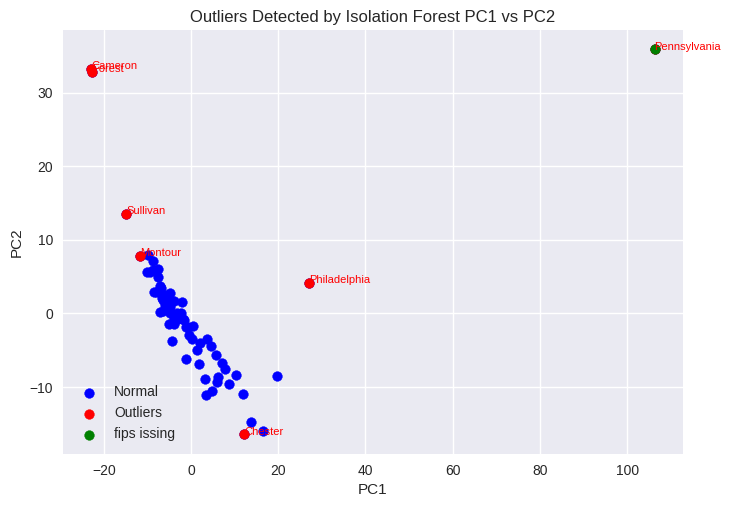

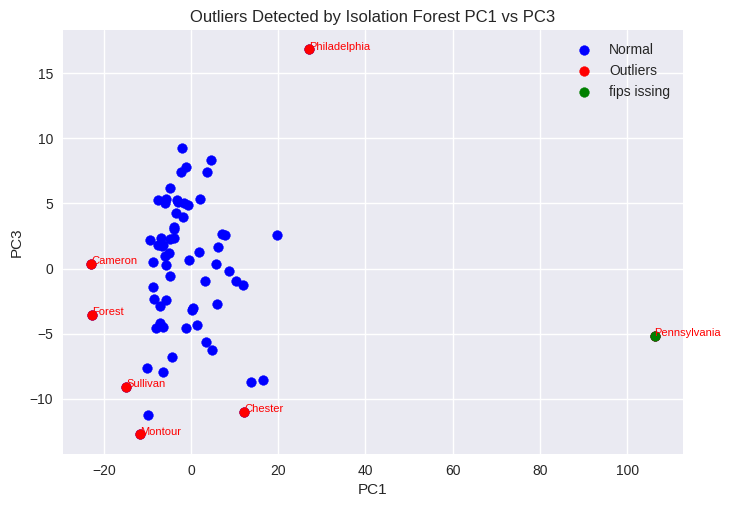

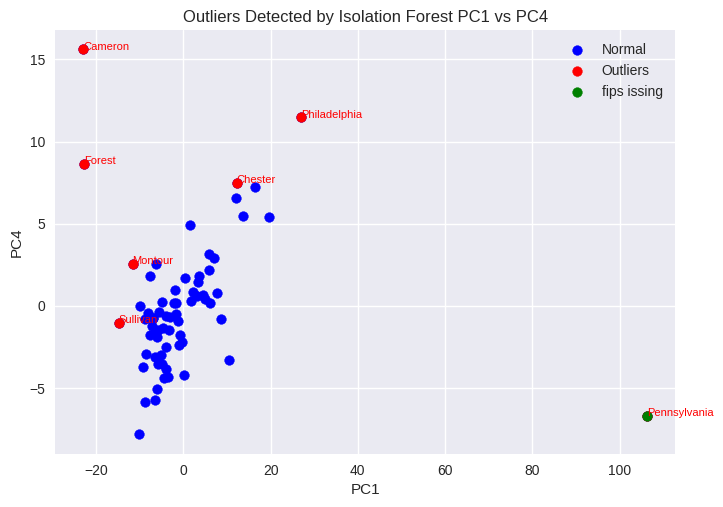

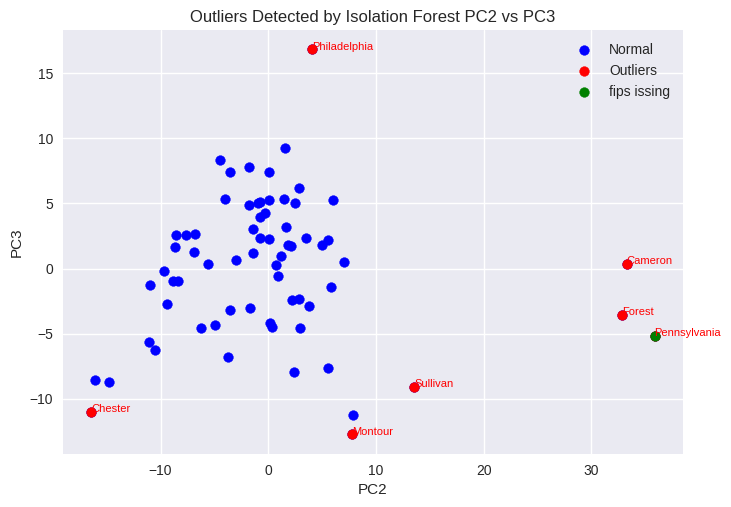

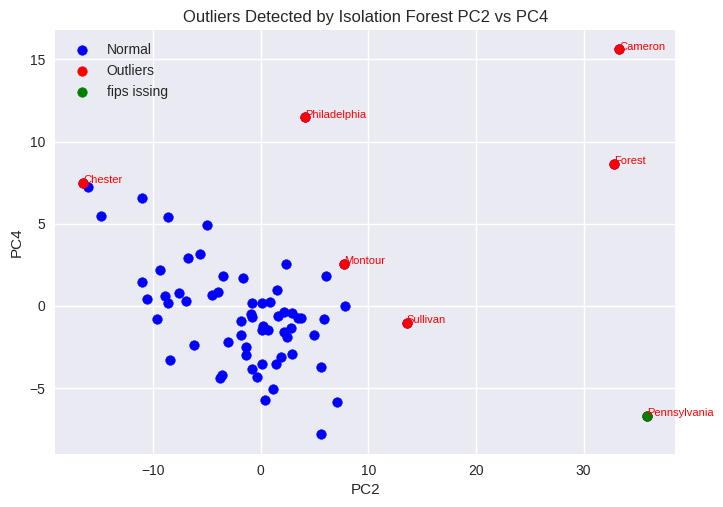

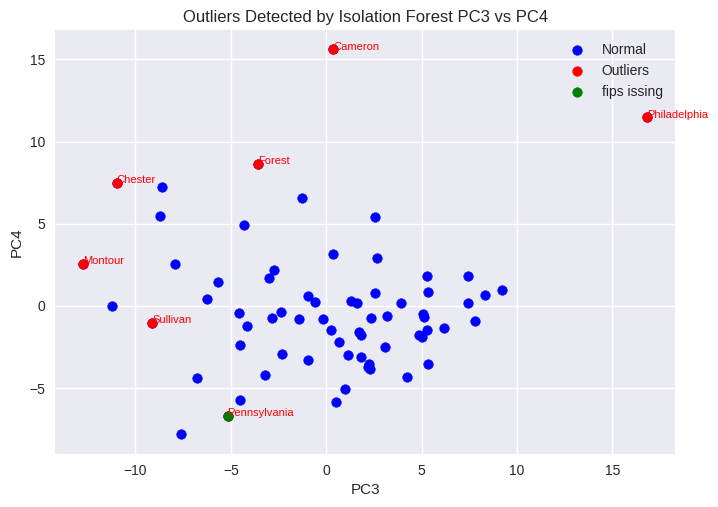

In [309]:
scatters('PC1', 'PC2')
scatters('PC1', 'PC3')
scatters('PC1', 'PC4')
scatters('PC2', 'PC3')
scatters('PC2', 'PC4')
scatters('PC3', 'PC4')

In [316]:
# Apply One-Class SVM for outier detection

# Create an instance of the OneClassSVM model
model2 = OneClassSVM(nu=0.08)

# Fit the model to your data
model2.fit(df_pca)

# Predict outliers using the trained model
df2['outliers_SVM'] = model2.predict(df_pca)

# Filter out the predicted outliers
df2['outliers_mask_SVM'] = df2['outliers_SVM'] == -1

df_outliers_SVM = df2[df2['outliers_mask_SVM'] == True]

df_outliers_SVM.head(20)

,GEO_ID,county,fips,DP03_0002E_missing,fips_missing,PC1,PC2,PC3,PC4,outliers,outliers_mask,outliers_IF,outliers_mask_IF,outliers_SVM,outliers__mask_SVM,outliers_mask_SVM
11,0500000US42023,Cameron,42023.000,0,0,-22.956,33.293,0.375,15.606,-1,True,-1,True,-1,False,True
14,0500000US42029,Chester,42029.000,0,0,12.241,-16.462,-10.990,7.499,-1,True,-1,True,-1,True,True
26,0500000US42053,Forest,42053.000,0,0,-22.790,32.841,-3.587,8.641,-1,True,-1,True,-1,False,True
33,0500000US42067,Juniata,42067.000,0,0,-10.092,5.583,-7.609,-7.834,1,False,1,False,-1,True,True
35,0500000US42071,Lancaster,42071.000,0,0,10.346,-8.394,-0.948,-3.278,1,False,1,False,-1,True,True
46,0500000US42093,Montour,42093.000,0,0,-11.662,7.764,-12.732,2.539,1,False,-1,True,-1,True,True


In [317]:
# Scatter plot of the data points
def scatters(var1, var2):
  plt.scatter(df2[var1], df2[var2], color='blue', label='Normal')
  plt.scatter(df_outliers_SVM[var1], df_outliers_SVM[var2], color='red', 
              label='Outliers')
  plt.scatter(fips_missing[var1], fips_missing[var2], color='green', 
              label='fips issing')

  # Add labels for the 'county' variable next to the red dots
  for i, county in enumerate(df_outliers_SVM['county']):
      plt.text(df_outliers_SVM[var1].iloc[i], df_outliers_SVM[var2].iloc[i], 
               county, color='red', fontsize=8)

  plt.xlabel(f'{var1}')
  plt.ylabel(f'{var2}')
  plt.title(f'Outliers Detected by OCSVM {var1} vs {var2}')
  plt.legend()
  plt.show()

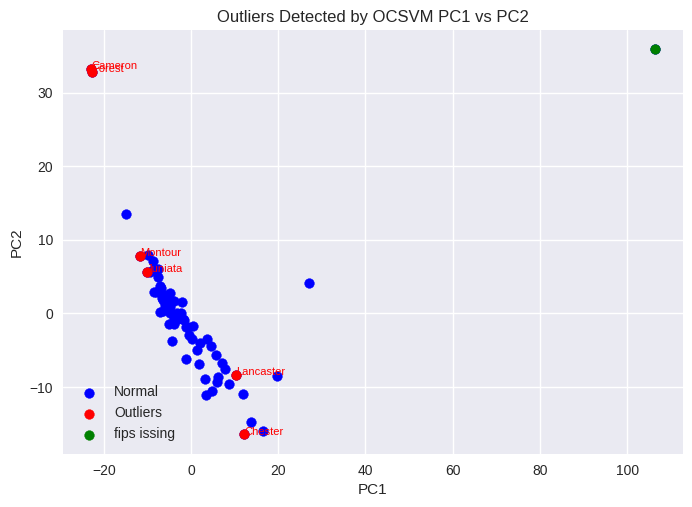

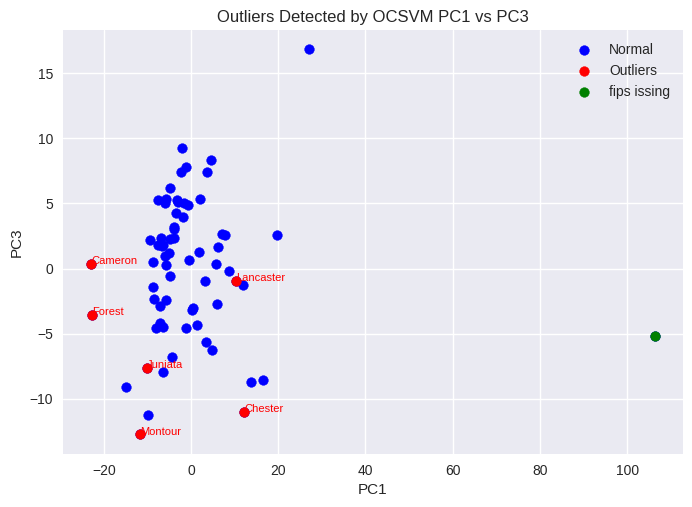

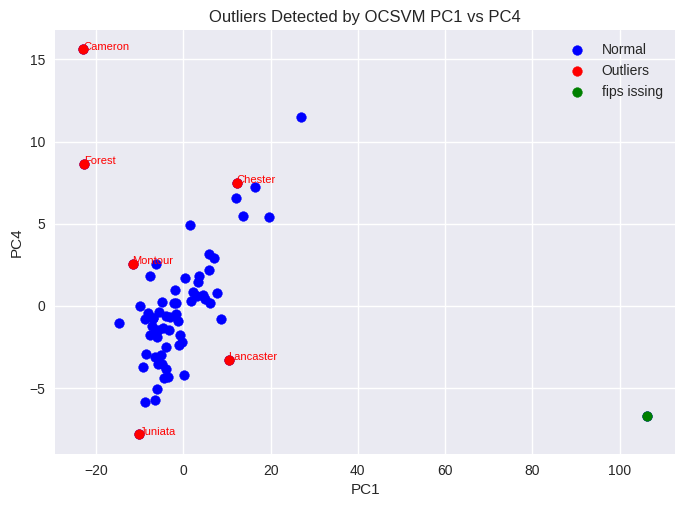

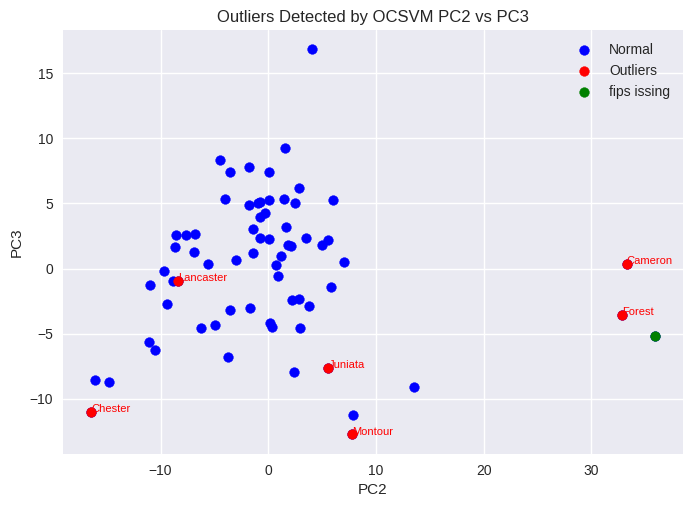

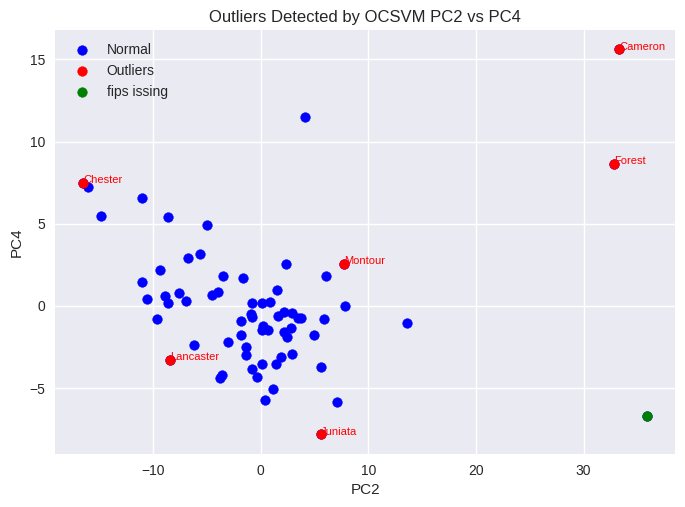

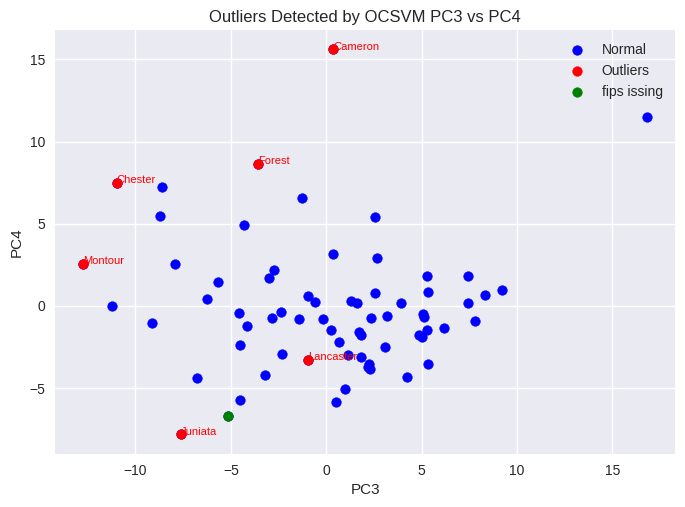

In [318]:
scatters('PC1', 'PC2')
scatters('PC1', 'PC3')
scatters('PC1', 'PC4')
scatters('PC2', 'PC3')
scatters('PC2', 'PC4')
scatters('PC3', 'PC4')